# **Prueba Arima**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [86]:
datos=pd.read_csv('datos.csv')
datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d')
datos.set_index('Fecha',inplace=True)
datos.head()

,Close
Fecha,
2024-01-01,0.970884
2024-01-02,-1.796099
2024-01-03,-0.230528
2024-01-04,0.209831
2024-01-05,1.579837


In [87]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [88]:
Prueba_Dickey_Fuller(datos["Close"],"Close")

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                       -1.879006e+01
p-value                               2.023533e-30
No Lags Used                          0.000000e+00
Número de observaciones utilizadas    3.640000e+02
Critical Value (1%)                  -3.448443e+00
Critical Value (5%)                  -2.869513e+00
Critical Value (10%)                 -2.571018e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


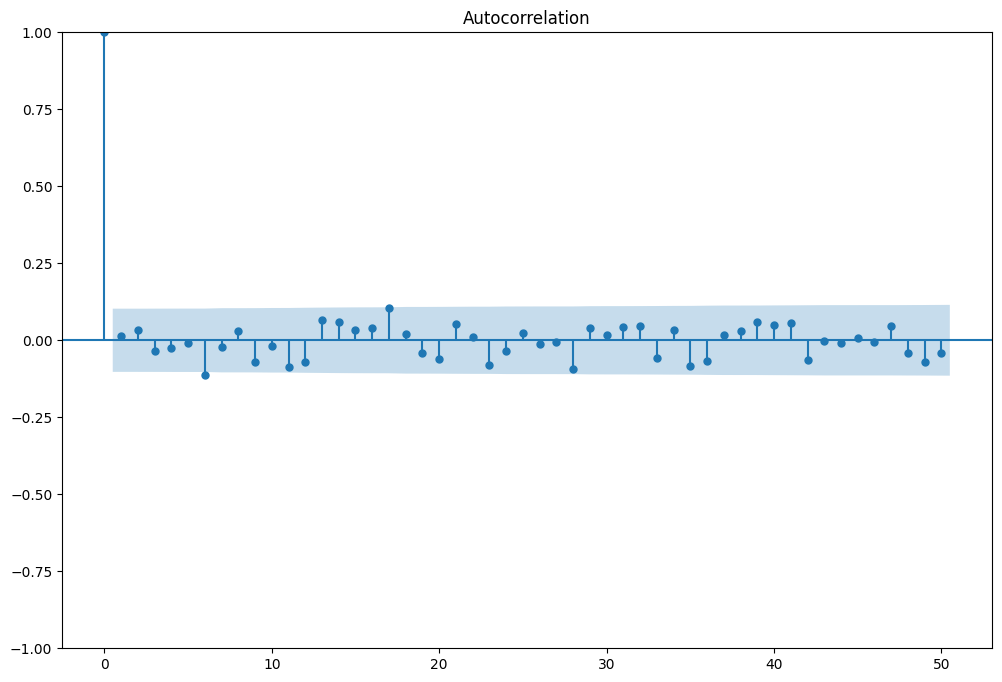

In [89]:
plot_acf(datos['Close'], lags=50, alpha=0.05)
plt.show()

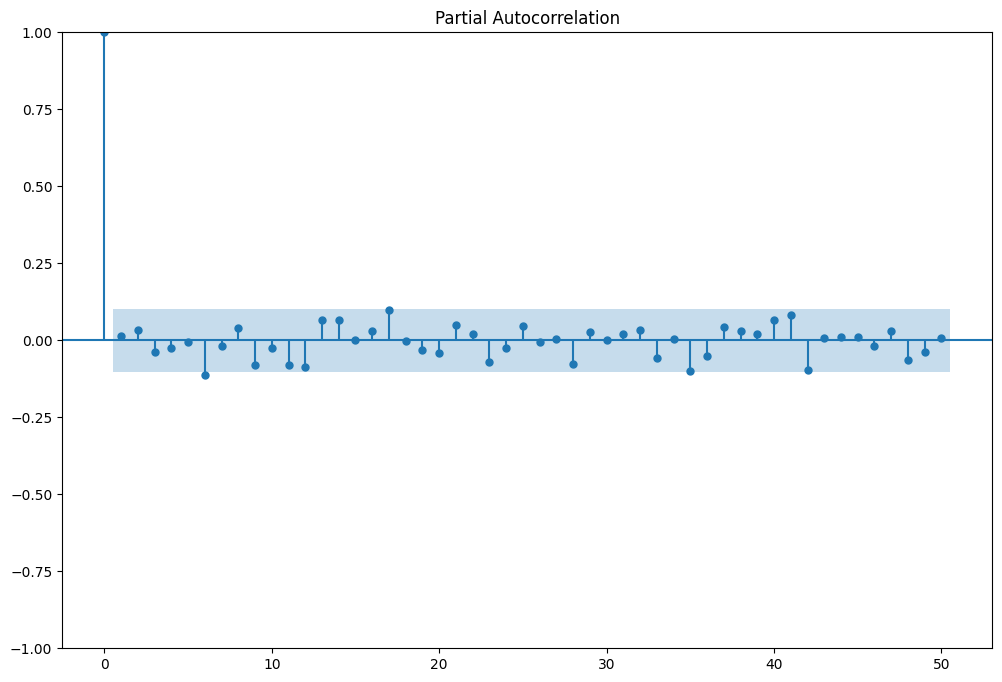

In [131]:
plot_pacf(datos['Close'], lags=50, alpha=0.05)
plt.show()

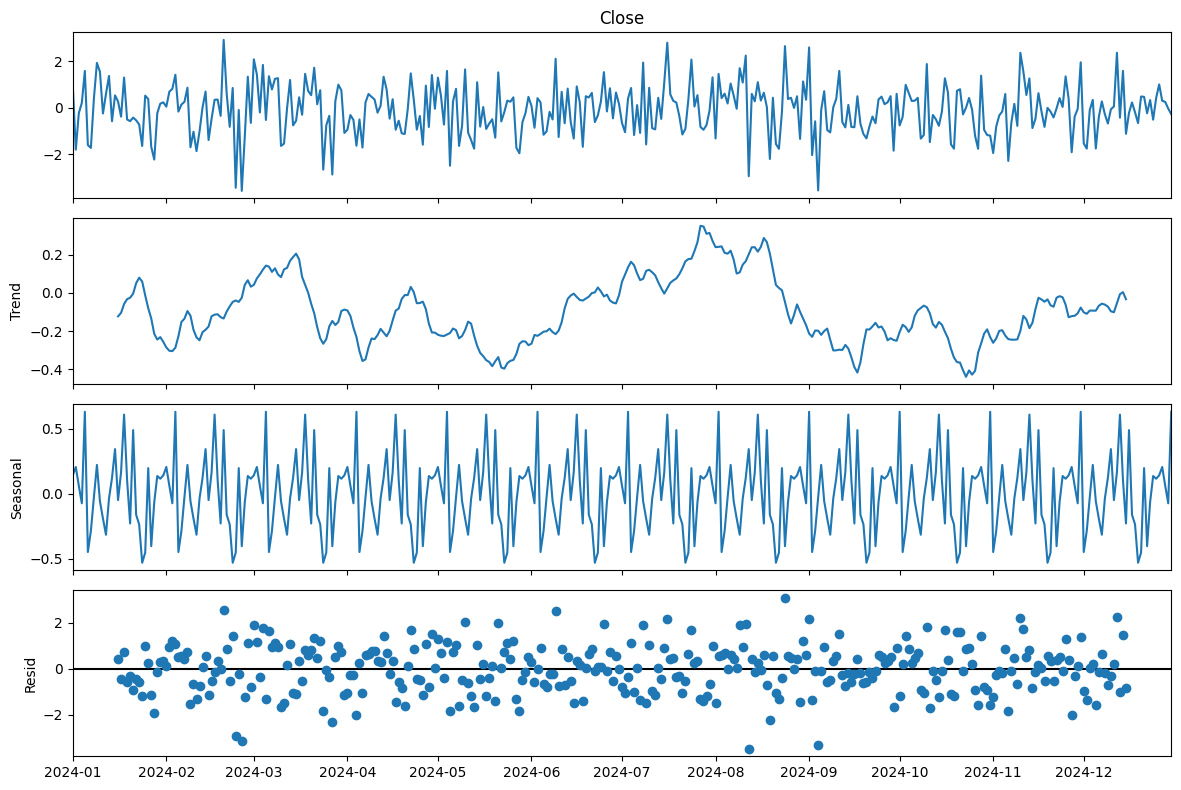

In [91]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(datos["Close"], model = "additive",period=30)
a.plot()
plt.show()

Algunas reglas generales son:
Utilizar un orden del término AR p igual al numero de *lags* que cruzan el límite de significancia en el gráfico PACF.

Utilizar un orden del término MA q igual al numero de *lags* que cruzan el límite de significancia en el gráfico ACF.

Si el ACF corta en el lag q y el PACF corta en el lag p, se recomienda empezar con un modelo ARIMA(p, d, q).

Si sólo el PACF decae después del lag p, se recomienda empezar con un modelo AR(p).

Si sólo el ACF decae después del lag q, se recomienda empezar con un modelo MA(q).

Estas pautas proporcionan un punto de partida útil al seleccionar los órdenes de un modelo ARIMA y pueden ser ajustadas según las características específicas de los datos en cuestión.




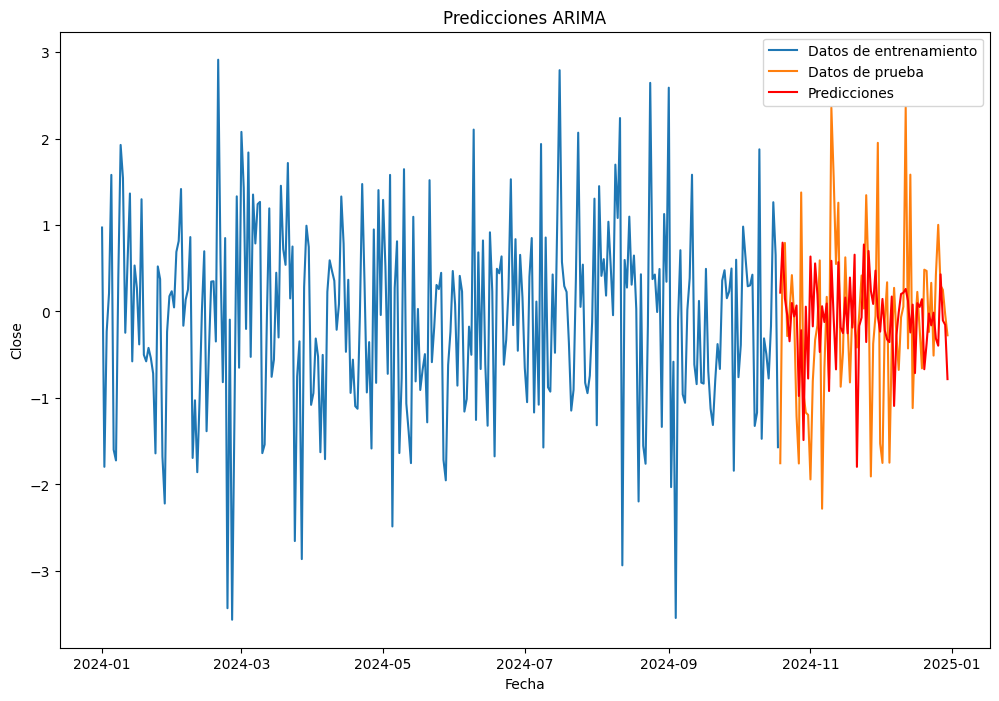

In [132]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(datos) * 0.8)
train, test = datos.iloc[:train_size], datos.iloc[train_size:]

# Ajustar el modelo ARIMA utilizando solo los datos de entrenamiento
modelo = ARIMA(train['Close'], order=(43,1,43))  
ajuste = modelo.fit()

# Realizar predicciones para los datos de prueba
predicciones = ajuste.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Graficar los datos de entrenamiento, los datos de prueba y las predicciones
plt.plot(train.index, train['Close'], label='Datos de entrenamiento')
plt.plot(test.index, test['Close'], label='Datos de prueba')
plt.plot(predicciones.index, predicciones, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.title('Predicciones ARIMA')
plt.legend()
plt.show()

In [133]:
import plotly.express as px

# Crear un DataFrame con los datos de entrenamiento, prueba y predicciones
df_train = train.reset_index()
df_test = test.reset_index()
df_predicciones = predicciones.reset_index()

In [136]:
import plotly.express as px

# Crear un DataFrame con los datos de entrenamiento, prueba y predicciones
df_train = train.reset_index()
df_test = test.reset_index()
df_predicciones = predicciones.reset_index()

# Graficar los datos de entrenamiento, prueba y predicciones
fig = px.line(df_train, x=df_train['Fecha'], y='Close', labels={'y': 'Close'}, title='Predicciones ARIMA')
fig.add_scatter(x=df_test['Fecha'], y=df_test['Close'], mode='lines', name='Datos de prueba')
fig.add_scatter(x=df_predicciones['index'], y=df_predicciones['predicted_mean'], mode='lines', name='Predicciones', line=dict(color='green'))
fig.update_xaxes(title_text='Fecha')
fig.show()


In [135]:
# Calcular la correlación entre test['Close'] y predicciones
correlacion = test['Close'].corr(predicciones)

print("Correlación entre test['Close'] y predicciones:", correlacion*100)

Correlación entre test['Close'] y predicciones: 10.672206328861334
